<a href="https://colab.research.google.com/github/eliauf23/gateway-data-science/blob/main/ws3_gds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Worksheet Week 3
### Classification I

In this worksheet you will work on a simple binary classification problem based on k-nearest neighbor classifier. 

### PART I: Understanding the data

We will work with the Breast Cancer Wisconsin dataset. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

For more information, see https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

**0. Up and running**

a) Import `numpy`, `matplotlib.pyplot` and `pandas`

**1. Load the dataset.**

a) You can use sklearn's datasets package, and the function `load_breast_cancer()`

b) Turn this data into a DataFrame, and have a look at it (using the functions ``head()`` and ``describe()``

In [17]:
# your code here

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns


data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["label"] = data.target
print(df)


     mean radius  mean texture  ...  worst fractal dimension  label
0          17.99         10.38  ...                  0.11890      0
1          20.57         17.77  ...                  0.08902      0
2          19.69         21.25  ...                  0.08758      0
3          11.42         20.38  ...                  0.17300      0
4          20.29         14.34  ...                  0.07678      0
..           ...           ...  ...                      ...    ...
564        21.56         22.39  ...                  0.07115      0
565        20.13         28.25  ...                  0.06637      0
566        16.60         28.08  ...                  0.07820      0
567        20.60         29.33  ...                  0.12400      0
568         7.76         24.54  ...                  0.07039      1

[569 rows x 31 columns]


In [18]:
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**2. Exploring the data**

a) How many samples are there? how many features, and what kind are they?
569


b) What is the distribution of classes in this dataset?
uniform classes with numerical data

c) To gain some more insight into these features, have a look at the distribution of the first four features. An appealing way of this is by computing *violin plots*. Try using the function `violinplot` of the `seaborn` package to display the distributions of the first four features *per class*




In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
df["label"].value_counts()

1    357
0    212
Name: label, dtype: int64

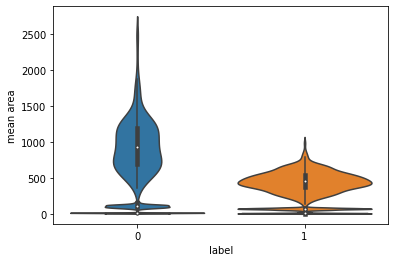

In [22]:
# fig, axes = plt.subplot(1, 4, figsize=(15,4))

sns.violinplot(data=df, x="label", y="mean radius")
sns.violinplot(data=df, x="label", y="mean texture")
sns.violinplot( x="label", y="mean perimeter", data=df)
sns.violinplot( x="label", y="mean area", data=df)


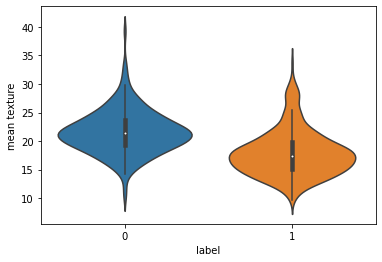

In [23]:
sns.violinplot( x="label", y="mean texture", data=df)


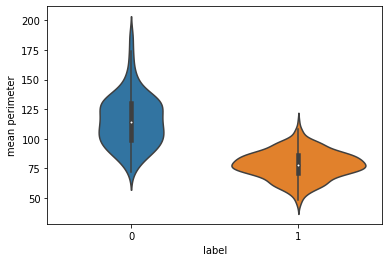

In [24]:
sns.violinplot( x="label", y="mean perimeter", data=df)


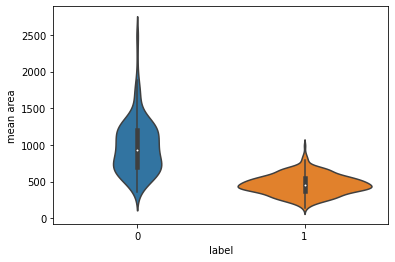

In [25]:
sns.violinplot( x="label", y="mean area", data=df)


## Part II: Classification

**1. Getting started**

a) Split the data into a training and validation set, at a ratio of 70/30. You can do this manually, or use the function `train_test_split()` from the package `sklearn.model_selection`.

b) Compute the distribution of positive and negative samples in your training and validation splits. Are they the same as the distribution of the original data? Compare with by using the parameter `stratify` within `train_test_split()`.

c) Import the function from `KNeighborsClassifier` from the package `sklearn.neighbors`, and create a classifier with the choice of $k=1$ -- one neighbor. Have a look at https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html for details

d) Fit the classifier (use the method `fit()` of the instance you created) to your training data, and then compute accuracy (use the method `score()`) on the validation data. What is the accuracy of this classifier?



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x = pd.DataFrame(data.data, columns=data.feature_names)
y = df.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.9122807017543859

**2. Dependence on amounts of data**

We will now explore how this performance depends on the number training data. 




a) As before, construct a training set and validation set.

b) Fit a k-NN classifier with increasing amounts of data, from 1 to $60$, then. For each model, record its training accuracy and validation accuracy.

c) Plot the obtained training and validation accuracy as a function of the number of training samples.

d) Since your results will depend on the specific (random) draw of your data, repeat points *a* and *b* above 20 times, each drawing a different split of training/validation. Finally, plot the *average* of the accuracies (training and validation) for each number of training samples.

e) Why is the training accuracy at 1?

f) Run again point *d* above, but now using a k-nearest neighbor classifier with $k=5$. What happened to the training accuracy, and why?

g) Noting that the validation accuracy is an unbiased estimate of the Risk of the classifier, what can you say about the value of the Training Error? is it unbiased?

In [36]:
# index i in array corresponds to number of data points
accuracy = [0] * 60
model = KNeighborsClassifier(n_neighbors=1)

for j in range(20):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y)
  for i in range(1, 60):
    x_new = x_train[0:i]
    y_new = y_train[0:i]
    model.fit(x_new, y_new)
    score = model.score(x_test[0:i], y_test[0:i])
    #print("index " ,i, ": score = ", score, "\n")
    accuracy[i] += score

num = np.divide(accuracy, 20)
print(num)

[0.         0.3        0.675      0.76666667 0.8125     0.8
 0.78333333 0.81428571 0.83125    0.86111111 0.855      0.84545455
 0.84583333 0.83846154 0.83928571 0.86       0.8625     0.87352941
 0.87222222 0.87894737 0.875      0.87619048 0.87272727 0.87391304
 0.87916667 0.874      0.87115385 0.87777778 0.87678571 0.87758621
 0.88       0.88064516 0.878125   0.87121212 0.87058824 0.87285714
 0.87222222 0.87432432 0.88026316 0.88205128 0.8825     0.88292683
 0.88452381 0.88837209 0.89204545 0.89333333 0.89347826 0.89042553
 0.88958333 0.88979592 0.889      0.89411765 0.89326923 0.89245283
 0.88981481 0.88818182 0.89107143 0.89298246 0.89224138 0.89322034]


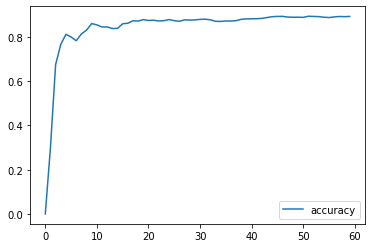

In [37]:
df = pd.DataFrame(num, columns=["accuracy"])
df.plot(y="accuracy" )


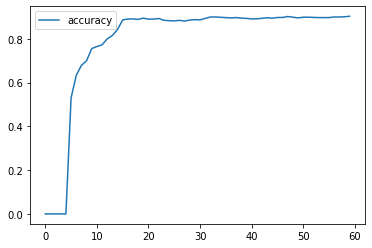

In [29]:
accuracy = [0] * 60
model = KNeighborsClassifier(n_neighbors=5)

for j in range(20):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=None)
  for i in range(5, 60):
    x_new = x_train[0:i]
    y_new = y_train[0:i]
    model.fit(x_new, y_new)
    accuracy[i] = accuracy[i] +  model.score(x_test[0:i], y_test[0:i])

num = np.divide(accuracy, 20)
df = pd.DataFrame(num, columns=["accuracy"])
df.plot(y="accuracy" )


**3. Number of Neighbors**

This classifier has 1 (hyper)parameter that needs tuning: the number of neighbors, $k$. While we will cover model selection later in the class, it is useful for you to start thinking about these questions.

We will select this parameter as the one that maximizes performance *on a validation set*. 

a) Similarly as before, partition your data into a training and validation set, now using 75% for the validation set. Train *different* kNN classifiers (for different values of k) on the training set, and evaluate their performance on the validation set, and plot the validation accuracy as a function of k. Adequate values of K to explore might be `K =  [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35]`.

b) Also, as before, one single run will have too high variance (because of the limited number of samples). As you did in 2.d, repeat this process 20 times, and report the mean validation accuracy as a function of $k$. Moreover, plot this mean together with its $5^{th}$ and $95^{th}$ percentiles of the accuracy for each $k$ (consider using the function `fill_between` of `matplotlib.pyplot`, as well as `numpy`'s `percentile` function. (use the `alpha` parameter for some extra aesthetics!)

c) What can you conclude about the number k? How does it influence the result? What value k would you choose?

In [30]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.25, stratify=None)
